# Rutik Bhoyar

# Task-3: Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’. As a business manager, try to find out the weak areas where you can work to make more profit. 


Importing required libraries and Reading Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data=pd.read_csv('SampleSuperstore.csv')

In [3]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.shape #check the shape of dataset

(9994, 13)

In [5]:
data.dtypes  #datatypes of labels present in the data

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [6]:
data.isna().sum()  #check presence of null values

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
#data.describe()  #get the summary of labels

In [8]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [9]:
data.duplicated().sum() #checking presence of duplicate values

17

In [10]:
data.drop_duplicates(subset=None,keep='first',inplace=True)
data.duplicated().sum()   #dropping the duplicates 

0

In [11]:
data['Postal Code']=data['Postal Code'].astype('object') #changing the datatype of postal code

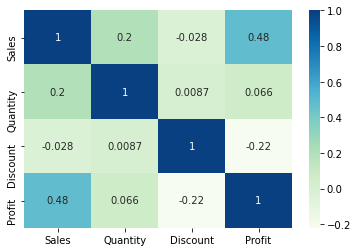

In [12]:
corr=data.corr()
sns.heatmap(corr,annot=True,cmap='GnBu')  #visualization using heatmap

In [13]:
data_drop=data.drop(['Postal Code'],axis=1)
#sns.pairplot(data,hue='Ship Mode')

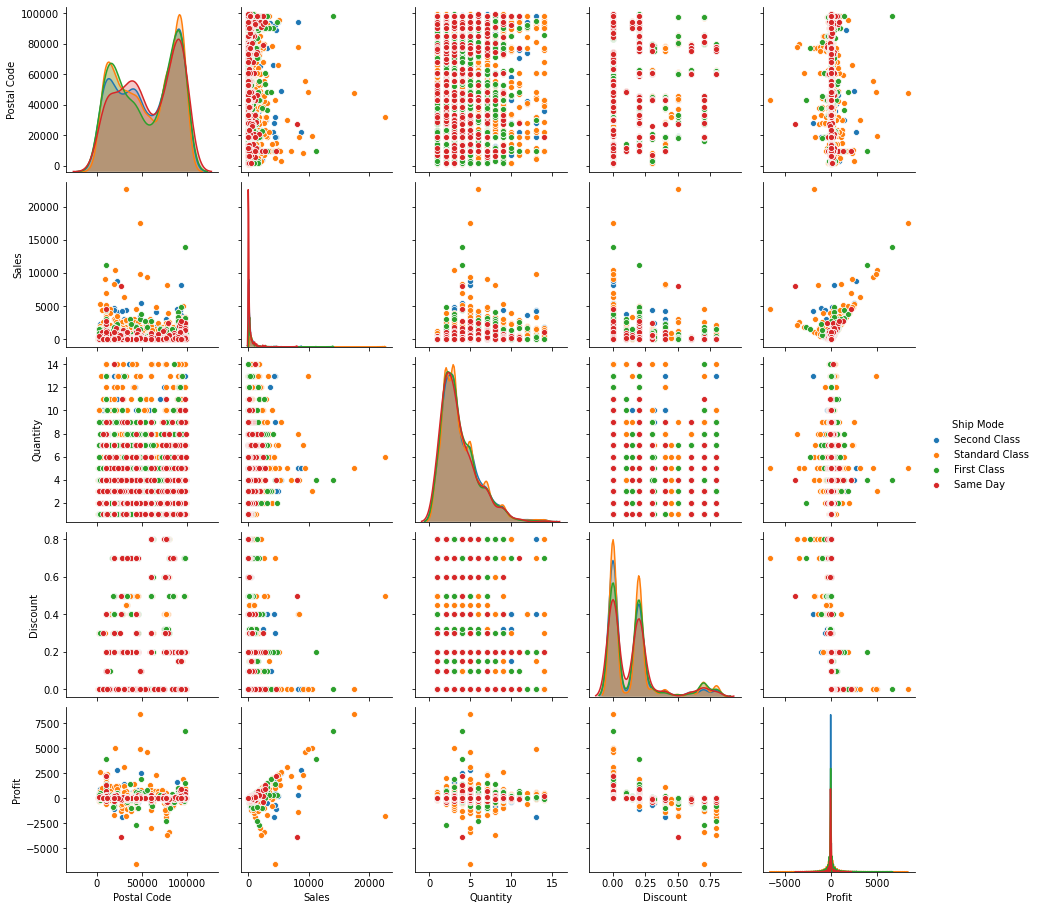

In [14]:
sns.pairplot(data,hue='Ship Mode')

In [15]:
data['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

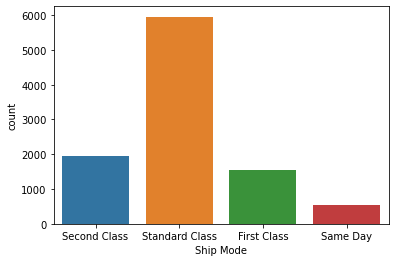

In [17]:
sns.countplot(x=data['Ship Mode'])

In [19]:
data['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

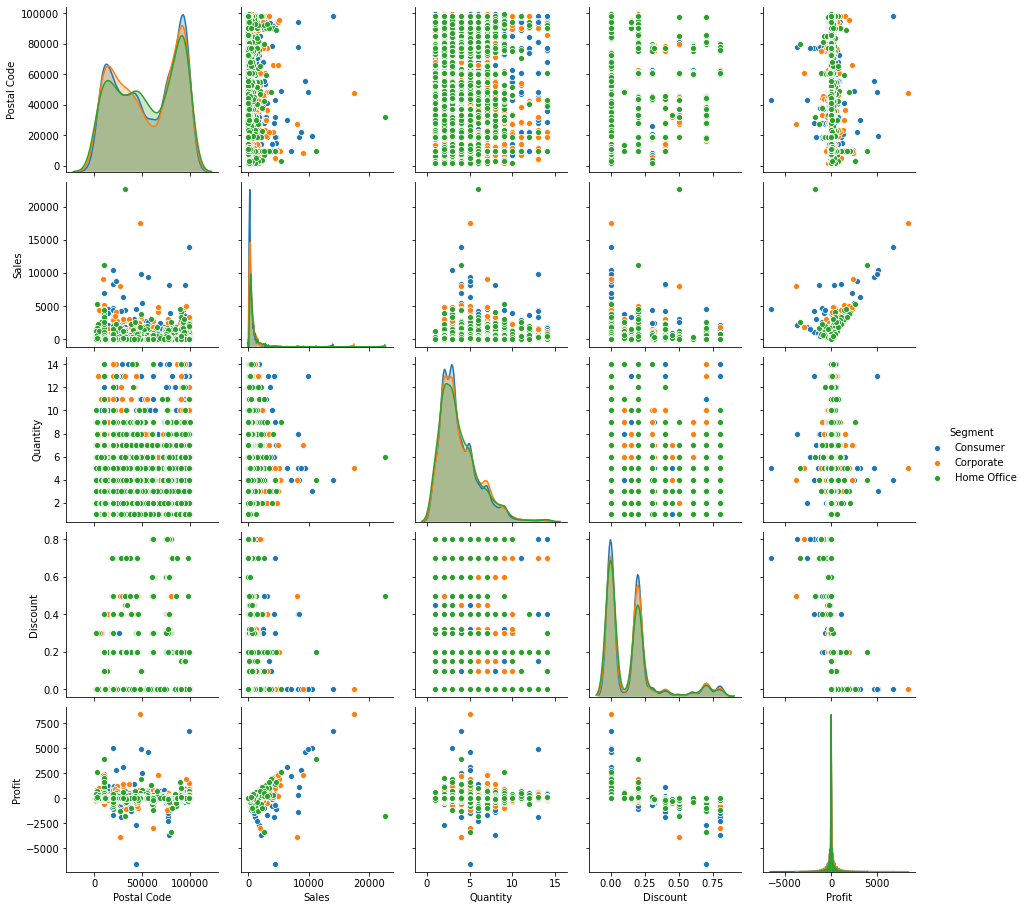

In [20]:
sns.pairplot(data,hue = 'Segment')     #plotting pair plot

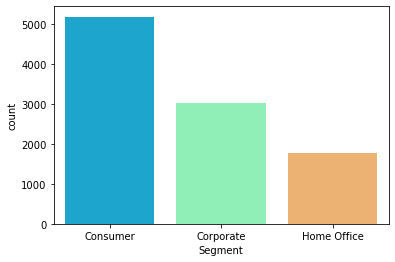

In [21]:
sns.countplot(x = 'Segment',data = data, palette = 'rainbow')

In [22]:
data['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

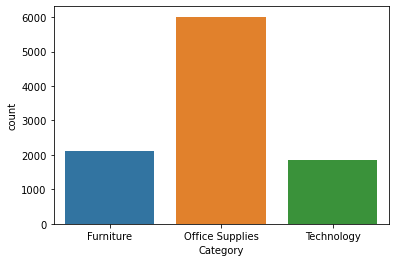

In [23]:
sns.countplot(x='Category',data=data,palette='tab10')

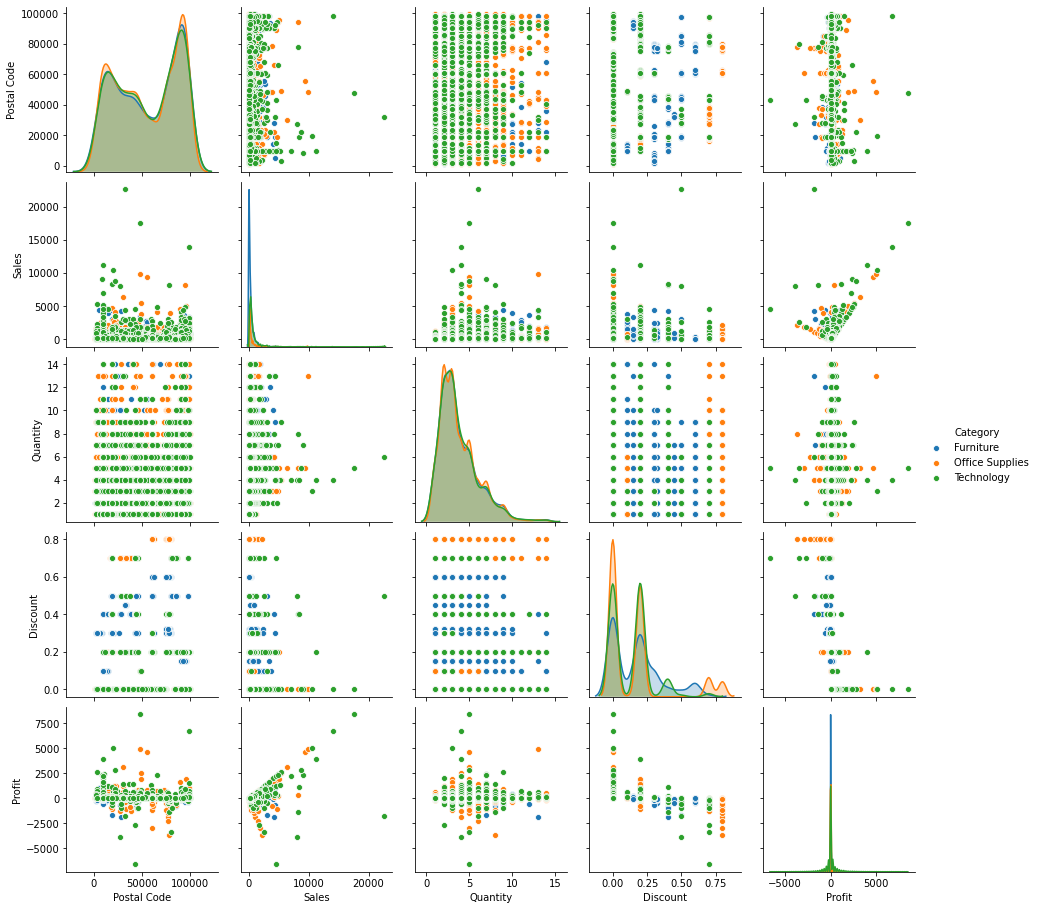

In [24]:
sns.pairplot(data,hue='Category')

In [25]:
data['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

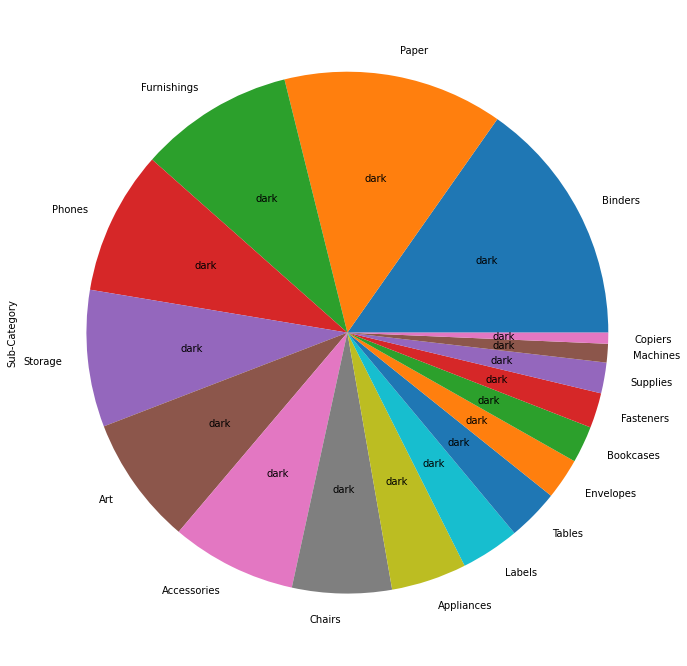

In [26]:
plt.figure(figsize=(15,12))
data['Sub-Category'].value_counts().plot.pie(autopct='dark')
plt.show()

Observation 1
Maximum are from Binders, Paper, furnishings, Phones, storage, art, accessories and minimum from copiers, machines, suppliers.

In [27]:
data['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

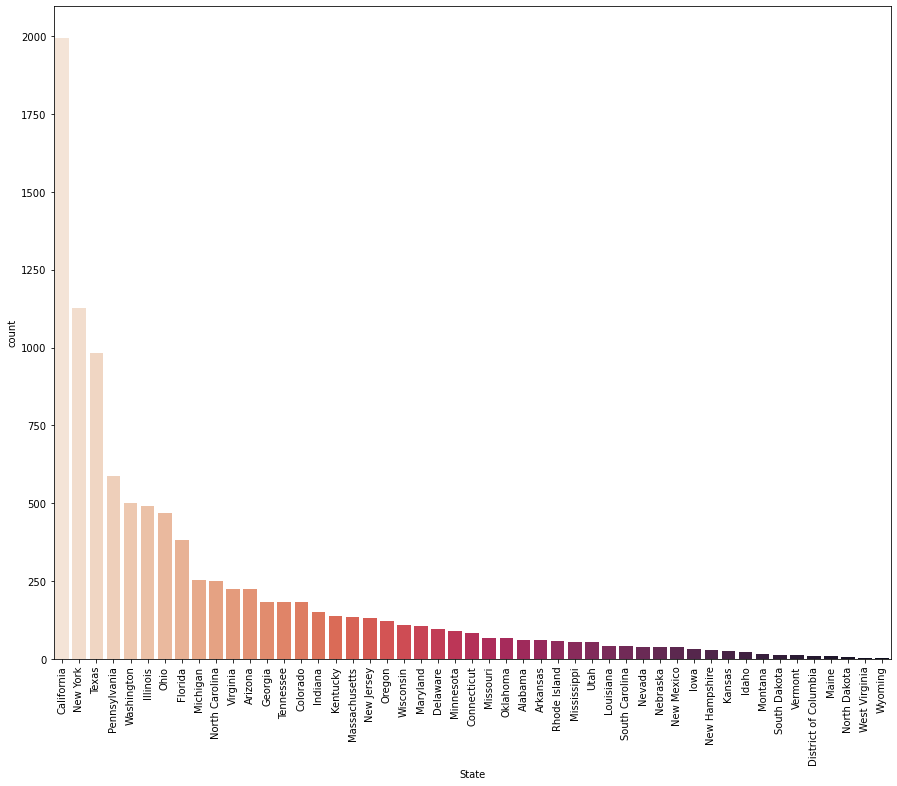

In [28]:
plt.figure(figsize=(15,12))
sns.countplot(x='State',data=data,palette='rocket_r',order=data['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

Observation 2
Most customers tends to buy quantity of 2 and 3
Discount give maximum is 0 to 20 percent

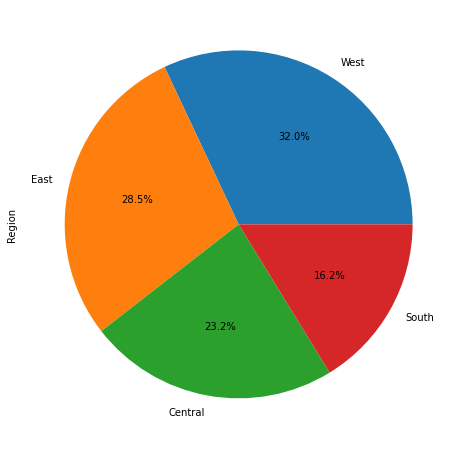

In [29]:
plt.figure(figsize=(10,8))
data['Region'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

Observation 3
Highest number of buyers are from California and New York

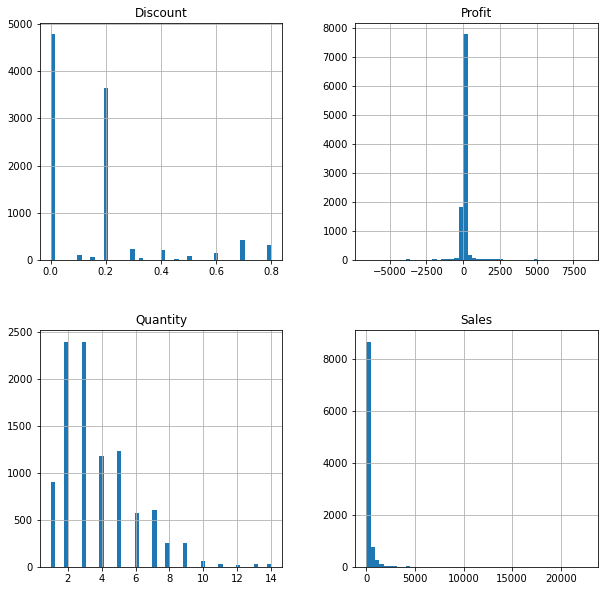

In [30]:
data.hist(figsize=(10,10),bins=50)
plt.show()

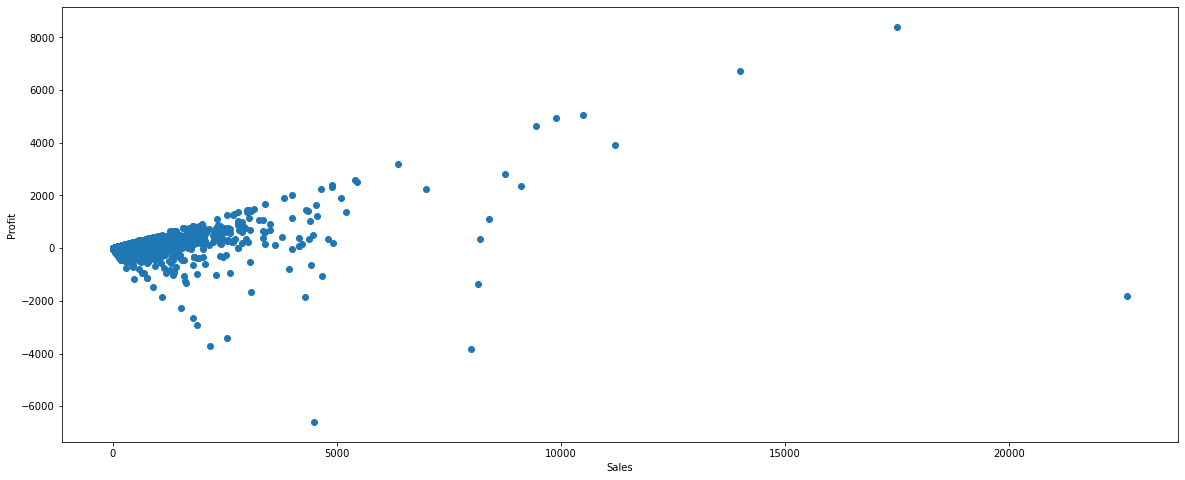

In [32]:
#Profit vs Discount

fig,ax=plt.subplots(figsize=(20,8))
ax.scatter(data['Sales'],data['Profit'])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()

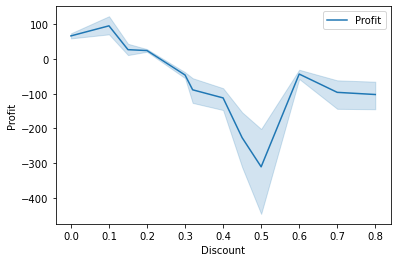

In [33]:
sns.lineplot(x='Discount',y='Profit',label='Profit',data=data)
plt.legend()
plt.show()

Observation 4
high profit is for california, new york
loss is for texas, pennsylvania, Ohio

In [34]:
t_states = data['State'].value_counts().nlargest(10)
t_states

California        1996
New York          1127
Texas              983
Pennsylvania       586
Washington         502
Illinois           491
Ohio               468
Florida            383
Michigan           254
North Carolina     249
Name: State, dtype: int64

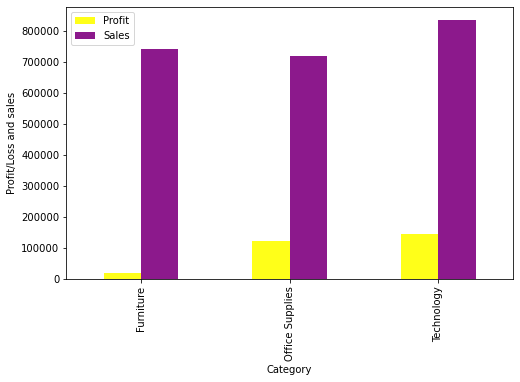

In [35]:
data.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['yellow','purple'],alpha=0.9,figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

Observation 5

As a business manager, try to find out the weak areas where you can work to make more profit?
Technology and Office Supplies have high profit.
Furniture have less profit

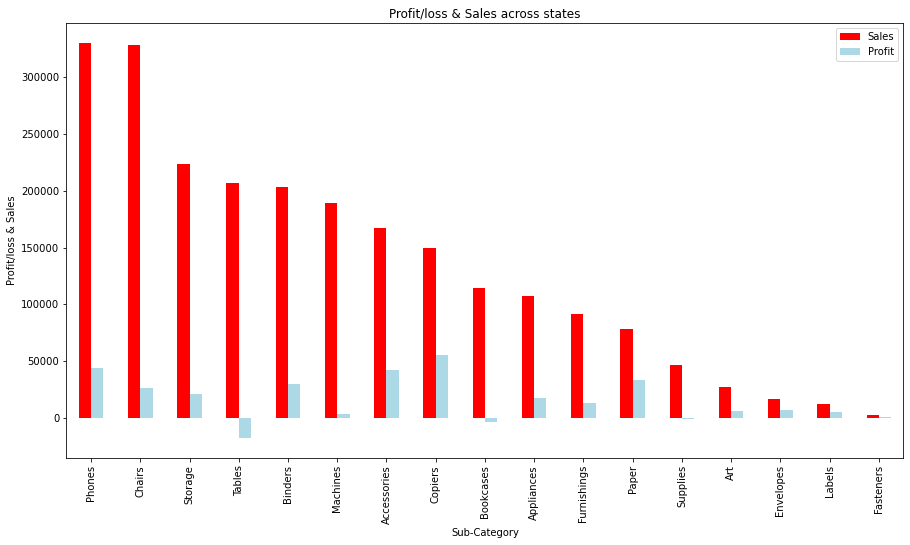

In [36]:
ps = data.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['red','lightblue'],figsize=(15,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('Sub-Category')
plt.ylabel('Profit/loss & Sales')
plt.show()

Observation 6

Segment wise sales are almost same in every region

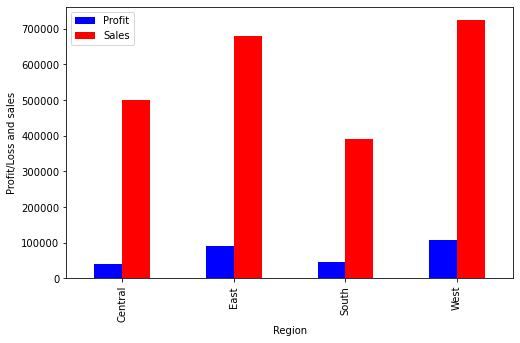

In [37]:
data.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['blue','red'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()